In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from fit import optimize_model

In [6]:
path = 'owid-monkeypox-data.csv'
dataset = pd.read_csv('owid-monkeypox-data.csv', delimiter = ',')
dataset.shape

(41731, 15)

In [7]:
country = 'China'
filtered_df = dataset[dataset['location'] == country]
selected_columns = ['date', 'total_cases', 'new_cases', 'new_cases_smoothed']  # Replace with the names of the columns you want
filtered_df = filtered_df.loc[:, selected_columns]
filtered_df

,date,total_cases,new_cases,new_cases_smoothed
8139,6/24/2022,1,1,0.14
8140,6/25/2022,1,0,0.14
8141,6/26/2022,1,0,0.14
8142,6/27/2022,1,0,0.14
8143,6/28/2022,1,0,0.14
...,...,...,...,...
8526,7/16/2023,253,0,2.57
8527,7/17/2023,253,0,2.57
8528,7/18/2023,366,113,17.14
8529,7/19/2023,368,2,16.57


In [8]:
filtered_df['date'] = pd.to_datetime(filtered_df['date'])
start_date = pd.to_datetime('2022-06-24')  # Replace with your desired start date
end_date = pd.to_datetime('2023-07-24')    # Replace with your desired end date

# Filter the DataFrame to select data within the date range
filtered_df = filtered_df[(filtered_df['date'] >= start_date) & (filtered_df['date'] <= end_date)]

In [9]:
null_values = filtered_df.isnull().sum()
null_values

date                  0
total_cases           0
new_cases             0
new_cases_smoothed    0
dtype: int64

In [10]:
def interpolate_missing(column):
    x = column.index[column.notnull()]
    y = column[column.notnull()]
    f = interp1d(x, y, kind='nearest', fill_value="extrapolate")
    return f(column.index)

In [11]:
for column in filtered_df.columns:
    if filtered_df[column].isnull().any():
        filtered_df[column] = interpolate_missing(filtered_df[column])

In [12]:
filtered_df.to_csv('Filled_NAN_exportData.csv', index=False)

In [13]:
filtered_df = filtered_df.sort_values(by='date')
filtered_df

,date,total_cases,new_cases,new_cases_smoothed
8139,2022-06-24,1,1,0.14
8140,2022-06-25,1,0,0.14
8141,2022-06-26,1,0,0.14
8142,2022-06-27,1,0,0.14
8143,2022-06-28,1,0,0.14
...,...,...,...,...
8526,2023-07-16,253,0,2.57
8527,2023-07-17,253,0,2.57
8528,2023-07-18,366,113,17.14
8529,2023-07-19,368,2,16.57


In [14]:
filtered_df.to_csv('ExportedData.csv', index=False)

In [17]:
filtered_df.describe()

,date,total_cases,new_cases,new_cases_smoothed
count,392,392.000000,392.000000,392.000000
mean,2023-01-05 12:00:00,40.528061,0.943878,0.770663
min,2022-06-24 00:00:00,1.000000,0.000000,0.000000
25%,2022-09-29 18:00:00,5.000000,0.000000,0.000000
50%,2023-01-05 12:00:00,6.000000,0.000000,0.000000
75%,2023-04-13 06:00:00,28.000000,0.000000,0.570000
max,2023-07-20 00:00:00,370.000000,113.000000,17.140000
std,NaN,70.690741,6.532775,1.832957


In [15]:
date = filtered_df['date']
variableName = 'total_cases'
realData = filtered_df[variableName]

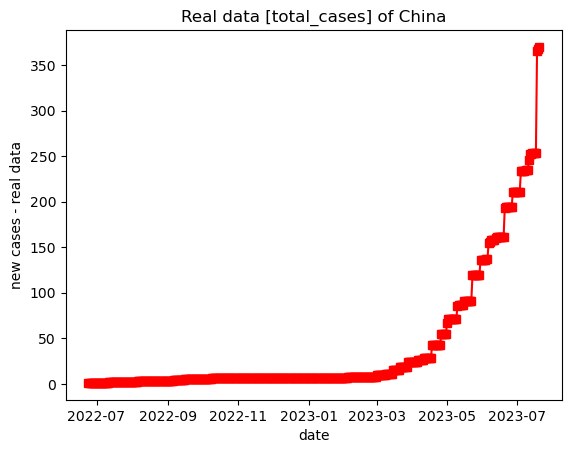

In [16]:
plt.figure()
plt.plot(date, realData, 'rs-')
plt.xlabel('date')
plt.ylabel('new cases - real data')
plt.title('Real data [' + variableName + '] of ' + country)
plt.savefig('realData.png', dpi=300)
plt.show()

In [13]:
# Define time points (in days)
t_sim = np.arange(len(date))
t_fit = np.arange(len(date))  # time points for fitting
t_sim.shape

(392,)

In [ ]:
# Call optimization function - this line of code takes much time.
best_params, I_h = optimize_model(realData, t_fit, n_iter=100)

In [ ]:
best_params

In [ ]:
# Print best-fit parameters
print('Best-fit parameters: kappa_h=%.5f, kappa_r=%.5f, rho_1=%.5f, rho_2=%.5f, rho_3=%.5f, chi_h=%.5f, chi_r=%.5f, tau=%.5f, omega_1=%.5f, omega_2=%.5f, omega_3=%.5f, xi_h=%.5f, gamma_1=%.5f, gamma_2=%.5f, gamma_3=%.5f, psi_h=%.5f, psi_r=%.5f' % tuple(best_params))

1. Best-fit parameters: kappa_h=0.86770, kappa_r=0.30560, rho_1=0.00807, rho_2=0.03089, rho_3=0.48042, chi_h=0.58229, chi_r=0.30710, tau=1.00042, omega_1=0.33561, omega_2=0.25713, omega_3=0.83473, xi_h=0.79374, gamma_1=0.76338, gamma_2=0.89685, gamma_3=0.68764, psi_h=0.87846, psi_r=0.01503

In [ ]:
# Plot the results
plt.figure(figsize=(7, 5))
plt.plot(date, realData, 'rs-')
plt.plot(t_sim, I_h, 'b-')
# plt.title('Curve Fitting: Real data[' + variableName + '] of ' +country+' fitted in the model')
plt.xlabel('Time (days)')
plt.ylabel('Prevalence')
# plt.legend('Real', 'Simulated', 'Prediction', loc='best')
plt.savefig('result.png', dpi = 300)
plt.savefig('result.eps', dpi = 300)
plt.show()

In [22]:
import numpy as np
from scipy.integrate import odeint

# Define time points (in days)
# t_sim = np.arange(392)

t_sim_for = np.arange(402)

# t_fit = np.arange(392)  # time points for fitting
# t_sim.shape

# Define model function
def model(y, t, kappa_h, kappa_r, rho_1, rho_2, rho_3, chi_h, chi_r, tau, omega_1, omega_2, omega_3, xi_h, gamma_1, gamma_2, gamma_3, psi_h, psi_r):
    S_h, E_h, A_h, I_h, Q_h, R_h, S_r, E_r, I_r = y
    N_h = 1425624477  # 2:04/ 5-7-2023 / https://www.worldometers.info/world-population/China-population/
    
    # Define initial conditions
    E_h0 = 5    # initial number of infected
    A_h0 = 5
    I_h0 = 1
    Q_h0 = 1    # initial number of recovered
    R_h0 = 0
    S_h0 = N_h - (E_h0 + A_h0 + I_h0 + Q_h0 + R_h0)

    E_r0 = 100
    I_r0 = 50
    S_r0 = S_h0 * 10e-2   # this condition is given from this paper: https://doi.org/10.3390/math11051121
    N_r = S_r0 + E_r0 + I_r0

    dS_hdt = kappa_h * N_h - rho_1 * I_r * S_h / N_h - rho_2 * I_h * S_h / N_h - chi_h * S_h + tau * Q_h
    dE_hdt = rho_1 * I_r * S_h / N_h + rho_2 * I_h * S_h / N_h - (omega_1 + omega_2 + omega_3 + chi_h) * E_h
    dA_hdt = omega_1 * E_h - (xi_h + chi_h + gamma_1) * A_h
    dI_hdt = omega_2 * E_h + xi_h * A_h - (chi_h + psi_h + gamma_2) * I_h
    dQ_hdt = omega_3 * E_h - (tau + gamma_3 + psi_h + chi_h) * Q_h
    dR_hdt = gamma_1 * A_h + gamma_2 * I_h + gamma_3 * Q_h - chi_h * R_h
    dS_rdt = kappa_r * N_r - rho_3 * S_r * I_r / N_r - chi_r * S_r
    dE_rdt = rho_3 * S_r * I_r / N_r - (chi_r + omega_3) * E_r
    dI_rdt = omega_3 * E_r - (chi_r + psi_r) * I_r
    return [dS_hdt, dE_hdt, dA_hdt, dI_hdt, dQ_hdt, dR_hdt, dS_rdt, dE_rdt, dI_rdt]

# Define parameter values
kappa_h = 0.86770
kappa_r = 0.30560
rho_1 = 0.00807
rho_2 = 0.03089
rho_3 = 0.48042
chi_h = 0.58229
chi_r = 0.30710
tau = 1.00042
omega_1 = 0.33561
omega_2 = 0.25713
omega_3 = 0.83473
xi_h = 0.79374
gamma_1 = 0.76338
gamma_2 = 0.89685
gamma_3=0.68764
psi_h = 0.87846
psi_r = 0.01503

N_h = 1425624477  # 2:04/5-7-2023 / https://www.worldometers.info/world-population/China-population/

# Define initial conditions
E_h0 = 5  # initial number of infected
A_h0 = 5
I_h0 = 1
Q_h0 = 1  # initial number of recovered
R_h0 = 0
S_h0 = N_h - (E_h0 + A_h0 + I_h0 + Q_h0 + R_h0)

E_r0 = 100
I_r0 = 50
S_r0 = S_h0 * 10e-2  # this condition is given from this paper: https://doi.org/10.3390/math11051121
N_r = S_r0 + E_r0 + I_r0

y0 = S_h0, E_h0, A_h0, I_h0, Q_h0, R_h0, S_r0, E_r0, I_r0
solution = odeint(model, y0, t_sim_for, args=(kappa_h, kappa_r, rho_1, rho_2, rho_3, chi_h, chi_r, tau, omega_1, omega_2, omega_3, xi_h, gamma_1, gamma_2, gamma_3, psi_h, psi_r))
# S_h, E_h, A_h, I_h, Q_h, R_h, S_r, E_r, I_r = solution.T
S_h_for, E_h_for, A_h_for, I_h_for, Q_h_for, R_h_for, S_r_for, E_r_for, I_r_for = solution.T

In [16]:
S_r = kappa_h*N_h/chi_h
S_h = kappa_r*N_r/chi_r
R0_r = (S_r*omega_3*rho_3)/(N_r*(chi_r + omega_3)*(chi_r + psi_r))
R0_h = (S_h*rho_2*(chi_h*omega_2 + gamma_1*omega_2 + omega_1*xi_h + omega_2*xi_h))/(N_h*(chi_h + gamma_2 + psi_h)*(chi_h + gamma_1 + xi_h)*(chi_h + omega_1 + omega_2 + omega_3))

In [17]:
print('R0_r: {:.4f}, and R0_h: {:.4f}'.format(R0_r, R0_h))

R0_r: 16.2467, and R0_h: 0.0002


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


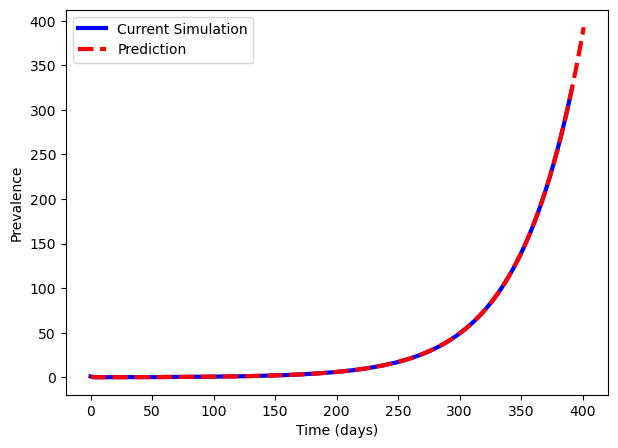

In [23]:
# Plot the results
plt.figure(figsize=(7, 5))
# plt.plot(date, realData, 'rs-')
plt.plot(t_sim, I_h, 'b-', label='Current Simulation', linewidth=3.0)
plt.plot(t_sim_for, I_h_for, 'r--', label='Prediction', linewidth=3.0)
# plt.title('Curve Fitting: Real data[' + variableName + '] of ' +country+' fitted in the model')
plt.xlabel('Time (days)')
plt.ylabel('Prevalence')
plt.legend(loc='best')
plt.savefig('forcastresult.png', dpi = 300)
plt.savefig('forcastresult.eps', dpi = 300)
plt.show()